In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load datasets
train_data = pd.read_csv('Titanic_train.csv')
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
test_data = pd.read_csv('Titanic_test.csv')
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
# Basic EDA
print(train_data.info())
print(train_data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

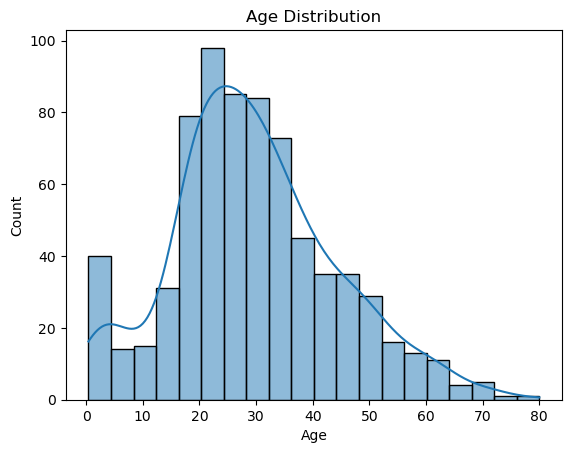

In [7]:
# Visualizations
sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

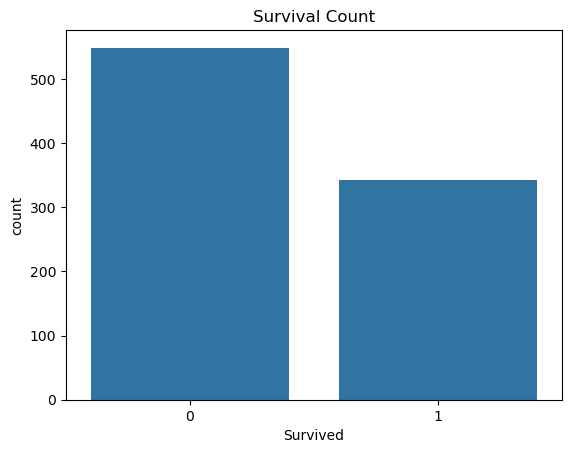

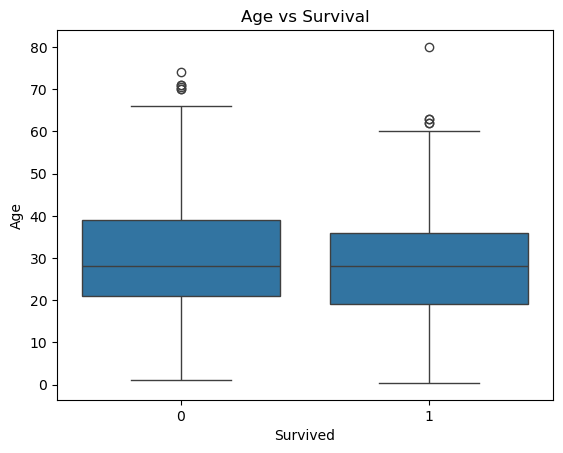

In [9]:
sns.countplot(x='Survived', data=train_data)
plt.title('Survival Count')
plt.show()

sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title('Age vs Survival')
plt.show()

In [11]:
# Handle missing values
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
test_data['Age'].fillna(train_data['Age'].mean(), inplace=True)

train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

C:\Users\Kaushal\AppData\Local\Temp\ipykernel_8680\807587221.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)
C:\Users\Kaushal\AppData\Local\Temp\ipykernel_8680\807587221.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as 

In [13]:
# Encode categorical variables
train_data = pd.get_dummies(train_data, columns=['Sex', 'Embarked'], drop_first=True)
test_data = pd.get_dummies(test_data, columns=['Sex', 'Embarked'], drop_first=True)

In [15]:
# Select features
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
X_train = train_data[features]
y_train = train_data['Survived']

In [17]:
# Split data
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [19]:
# Standardize features
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [21]:
# Train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [23]:
import joblib
joblib.dump(model, "logistic_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [25]:
# Predictions
y_pred = model.predict(X_val)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC-AUC: 0.8818532818532818


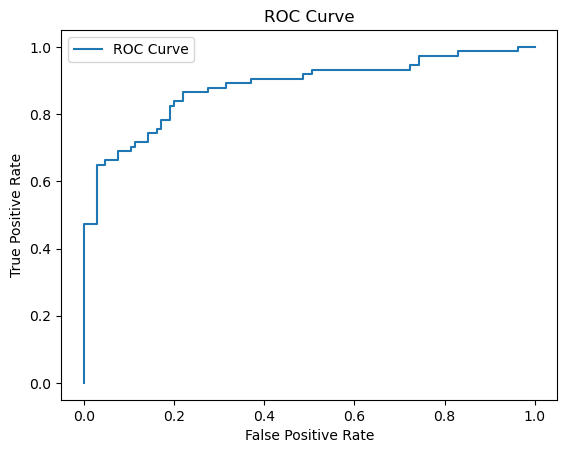

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Metrics
print(f"Accuracy: {accuracy_score(y_val, y_pred)}")
print(f"Precision: {precision_score(y_val, y_pred)}")
print(f"Recall: {recall_score(y_val, y_pred)}")
print(f"F1 Score: {f1_score(y_val, y_pred)}")
print(f"ROC-AUC: {roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])}")

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, model.predict_proba(X_val)[:, 1])
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [29]:
# Feature importance
coefficients = pd.DataFrame({'Feature': features, 'Coefficient': model.coef_[0]})
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
print(coefficients)

      Feature  Coefficient
4        Fare     0.124708
6  Embarked_Q    -0.039594
3       Parch    -0.099004
7  Embarked_S    -0.192275
2       SibSp    -0.351385
1         Age    -0.405537
0      Pclass    -0.788321
5    Sex_male    -1.276292


In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import joblib

# Load trained model and scaler
model = joblib.load("C:\\Users\\Kaushal\\OneDrive\\Desktop\\Data Science Assignments\\Finished Assignments\\Logistic regression\\logistic_model.pkl")
scaler = joblib.load("C:\\Users\\Kaushal\\OneDrive\\Desktop\\Data Science Assignments\\Finished Assignments\\Logistic regression\\scaler.pkl")

st.title("Titanic Survival Prediction")
st.write("Enter passenger details to predict survival.")

# User Input Fields
pclass = st.selectbox("Passenger Class", [1, 2, 3])
sex = st.radio("Sex", ["Male", "Female"])
age = st.number_input("Age", min_value=0, max_value=100, value=30)
sibsp = st.number_input("Siblings/Spouses Aboard", min_value=0, max_value=10, value=0)
parch = st.number_input("Parents/Children Aboard", min_value=0, max_value=10, value=0)
fare = st.number_input("Fare", min_value=0.0, value=32.0)
embarked = st.selectbox("Embarked Port", ["C (Cherbourg)", "Q (Queenstown)", "S (Southampton)"])

# Convert categorical variables
sex = 1 if sex == "Male" else 0
embarked_q = 1 if embarked == "Q (Queenstown)" else 0
embarked_s = 1 if embarked == "S (Southampton)" else 0

# Define feature names (must match training features)
feature_names = ["Pclass", "Age", "SibSp", "Parch", "Fare", "Sex_male", "Embarked_Q", "Embarked_S"]

# Convert input to DataFrame with feature names
input_data = pd.DataFrame([[pclass, age, sibsp, parch, fare, sex, embarked_q, embarked_s]], columns=feature_names)

# Scale input using the trained scaler
input_data = scaler.transform(input_data)

# Predict
if st.button("Predict"):
    prediction = model.predict(input_data)
    survival = "Survived!" if prediction[0] == 1 else "Did Not Survive."
    st.success(f"Prediction: {survival}") 


In [ ]:
1. What is the difference between precision and recall?
--> Precision measures how many of the predicted positives are actually correct (TP / (TP + FP)).
--> Recall measures how many actual positives were correctly predicted (TP / (TP + FN)).

2. What is cross-validation, and why is it important in binary classification?
--> Cross-validation splits data into multiple subsets to train and validate the model on different partitions
--> Common method: k-fold cross-validation, where the dataset is divided into k folds, and each fold is used as a validation set once.